In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ziadmuhammadbarro","key":"1c0ff655fad50a839d3c08328c644404"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/sports-classification

100% 422M/424M [00:15<00:00, 38.5MB/s]
100% 424M/424M [00:15<00:00, 29.5MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('/content/sports-classification.zip', 'r') as zip_ref:
      zip_ref.extractall('/content/sports-classification')

In [ ]:
import keras
import tensorflow as tf
import cv2
import glob as gb
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
path_test = r'/content/sports-classification/test'
path_train = r"/content/sports-classification/train"


folders=[]

for folder in os.listdir(path_train ):
    files = gb.glob(pathname=str(path_train + "/"+ folder + '/*.jpg'))
    folders.append(folder)
    print(f'For training data , found {len(files)} in folder {folder}')


For training data , found 120 in folder chuckwagon racing
For training data , found 151 in folder figure skating pairs
For training data , found 189 in folder nascar racing
For training data , found 138 in folder bobsled
For training data , found 150 in folder giant slalom
For training data , found 112 in folder air hockey
For training data , found 129 in folder cricket
For training data , found 141 in folder rock climbing
For training data , found 190 in folder formula 1 racing
For training data , found 149 in folder bull riding
For training data , found 169 in folder basketball
For training data , found 157 in folder polo
For training data , found 157 in folder field hockey
For training data , found 123 in folder disc golf
For training data , found 111 in folder mushing
For training data , found 102 in folder horseshoe pitching
For training data , found 113 in folder axe throwing
For training data , found 130 in folder ice climbing
For training data , found 142 in folder volleyball
F

In [ ]:
for folder in os.listdir(path_test):
    files = gb.glob(pathname=str(path_test + "/"+folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')


For training data , found 5 in folder chuckwagon racing
For training data , found 5 in folder figure skating pairs
For training data , found 5 in folder nascar racing
For training data , found 5 in folder bobsled
For training data , found 5 in folder giant slalom
For training data , found 5 in folder air hockey
For training data , found 5 in folder cricket
For training data , found 5 in folder rock climbing
For training data , found 5 in folder formula 1 racing
For training data , found 5 in folder bull riding
For training data , found 5 in folder basketball
For training data , found 5 in folder polo
For training data , found 5 in folder field hockey
For training data , found 5 in folder disc golf
For training data , found 5 in folder mushing
For training data , found 5 in folder horseshoe pitching
For training data , found 5 in folder axe throwing
For training data , found 5 in folder ice climbing
For training data , found 5 in folder volleyball
For training data , found 5 in folder m

In [ ]:
code = {}


for label , encode in zip(folders,range(len(folders))) :
    code[label] = encode


print(code)

def getcode(n):
    for x, y in code.items():
        if n == y:
            return x


{'chuckwagon racing': 0, 'figure skating pairs': 1, 'nascar racing': 2, 'bobsled': 3, 'giant slalom': 4, 'air hockey': 5, 'cricket': 6, 'rock climbing': 7, 'formula 1 racing': 8, 'bull riding': 9, 'basketball': 10, 'polo': 11, 'field hockey': 12, 'disc golf': 13, 'mushing': 14, 'horseshoe pitching': 15, 'axe throwing': 16, 'ice climbing': 17, 'volleyball': 18, 'motorcycle racing': 19, 'wingsuit flying': 20, 'archery': 21, 'jai alai': 22, 'tug of war': 23, 'snowmobile racing': 24, 'water cycling': 25, 'skydiving': 26, 'horse jumping': 27, 'sumo wrestling': 28, 'log rolling': 29, 'wheelchair basketball': 30, 'shot put': 31, 'hurdles': 32, 'javelin': 33, 'high jump': 34, 'horse racing': 35, 'figure skating women': 36, 'judo': 37, 'baseball': 38, 'parallel bar': 39, 'surfing': 40, 'fencing': 41, 'lacrosse': 42, 'sailboat racing': 43, 'pommel horse': 44, 'hockey': 45, 'figure skating men': 46, 'pole dancing': 47, 'barell racing': 48, 'ultimate': 49, 'arm wrestling': 50, 'bowling': 51, 'hamm

In [ ]:
size = []
binary=[]
for folder in os.listdir(path_train ):
    files = gb.glob(pathname=str(path_train+ "/"+folder + '/*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
        if image.shape == (224, 224):
            binary.append(file)
print(type(size[0]))
print(binary)
pd.Series(size).value_counts()


<class 'tuple'>
['/content/sports-classification/train/shot put/059.jpg', '/content/sports-classification/train/hammer throw/007.jpg', '/content/sports-classification/train/hammer throw/010.jpg', '/content/sports-classification/train/rowing/049.jpg', '/content/sports-classification/train/rowing/142.jpg', '/content/sports-classification/train/rowing/074.jpg', '/content/sports-classification/train/rowing/068.jpg', '/content/sports-classification/train/boxing/040.jpg', '/content/sports-classification/train/rings/131.jpg']


(224, 224, 3)    13483
(224, 224)           9
dtype: int64

In [ ]:
size = []
binaryTest = []
for folder in os.listdir(path_test):
    files = gb.glob(pathname=str(path_test + "/"+folder + '/*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
        if image.shape == (224, 224):
            binaryTest.append(file)
print(binaryTest)
pd.Series(size).value_counts()


['/content/sports-classification/test/ski jumping/2.jpg']


(224, 224, 3)    499
(224, 224)         1
dtype: int64

In [ ]:
# to remove binary image train folder

for i in binary :
    try :
        os.remove(i)
    except :pass

In [ ]:
# to remove binary image test folder
try:
    os.remove(binaryTest[0])
except :pass

In [ ]:
print(binary,binaryTest)

['/content/sports-classification/train/shot put/059.jpg', '/content/sports-classification/train/hammer throw/007.jpg', '/content/sports-classification/train/hammer throw/010.jpg', '/content/sports-classification/train/rowing/049.jpg', '/content/sports-classification/train/rowing/142.jpg', '/content/sports-classification/train/rowing/074.jpg', '/content/sports-classification/train/rowing/068.jpg', '/content/sports-classification/train/boxing/040.jpg', '/content/sports-classification/train/rings/131.jpg'] ['/content/sports-classification/test/ski jumping/2.jpg']


In [ ]:
s = 224
X_train = []
y_train = []
for folder in os.listdir(path_train ):
    files = gb.glob(pathname=str(
        path_train + "/"+folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image, (s, s))
        X_train.append(list(image_array))
        y_train.append(code[folder])


In [ ]:
print(f'we have {len(X_train)} items in X_train')


we have 13483 items in X_train


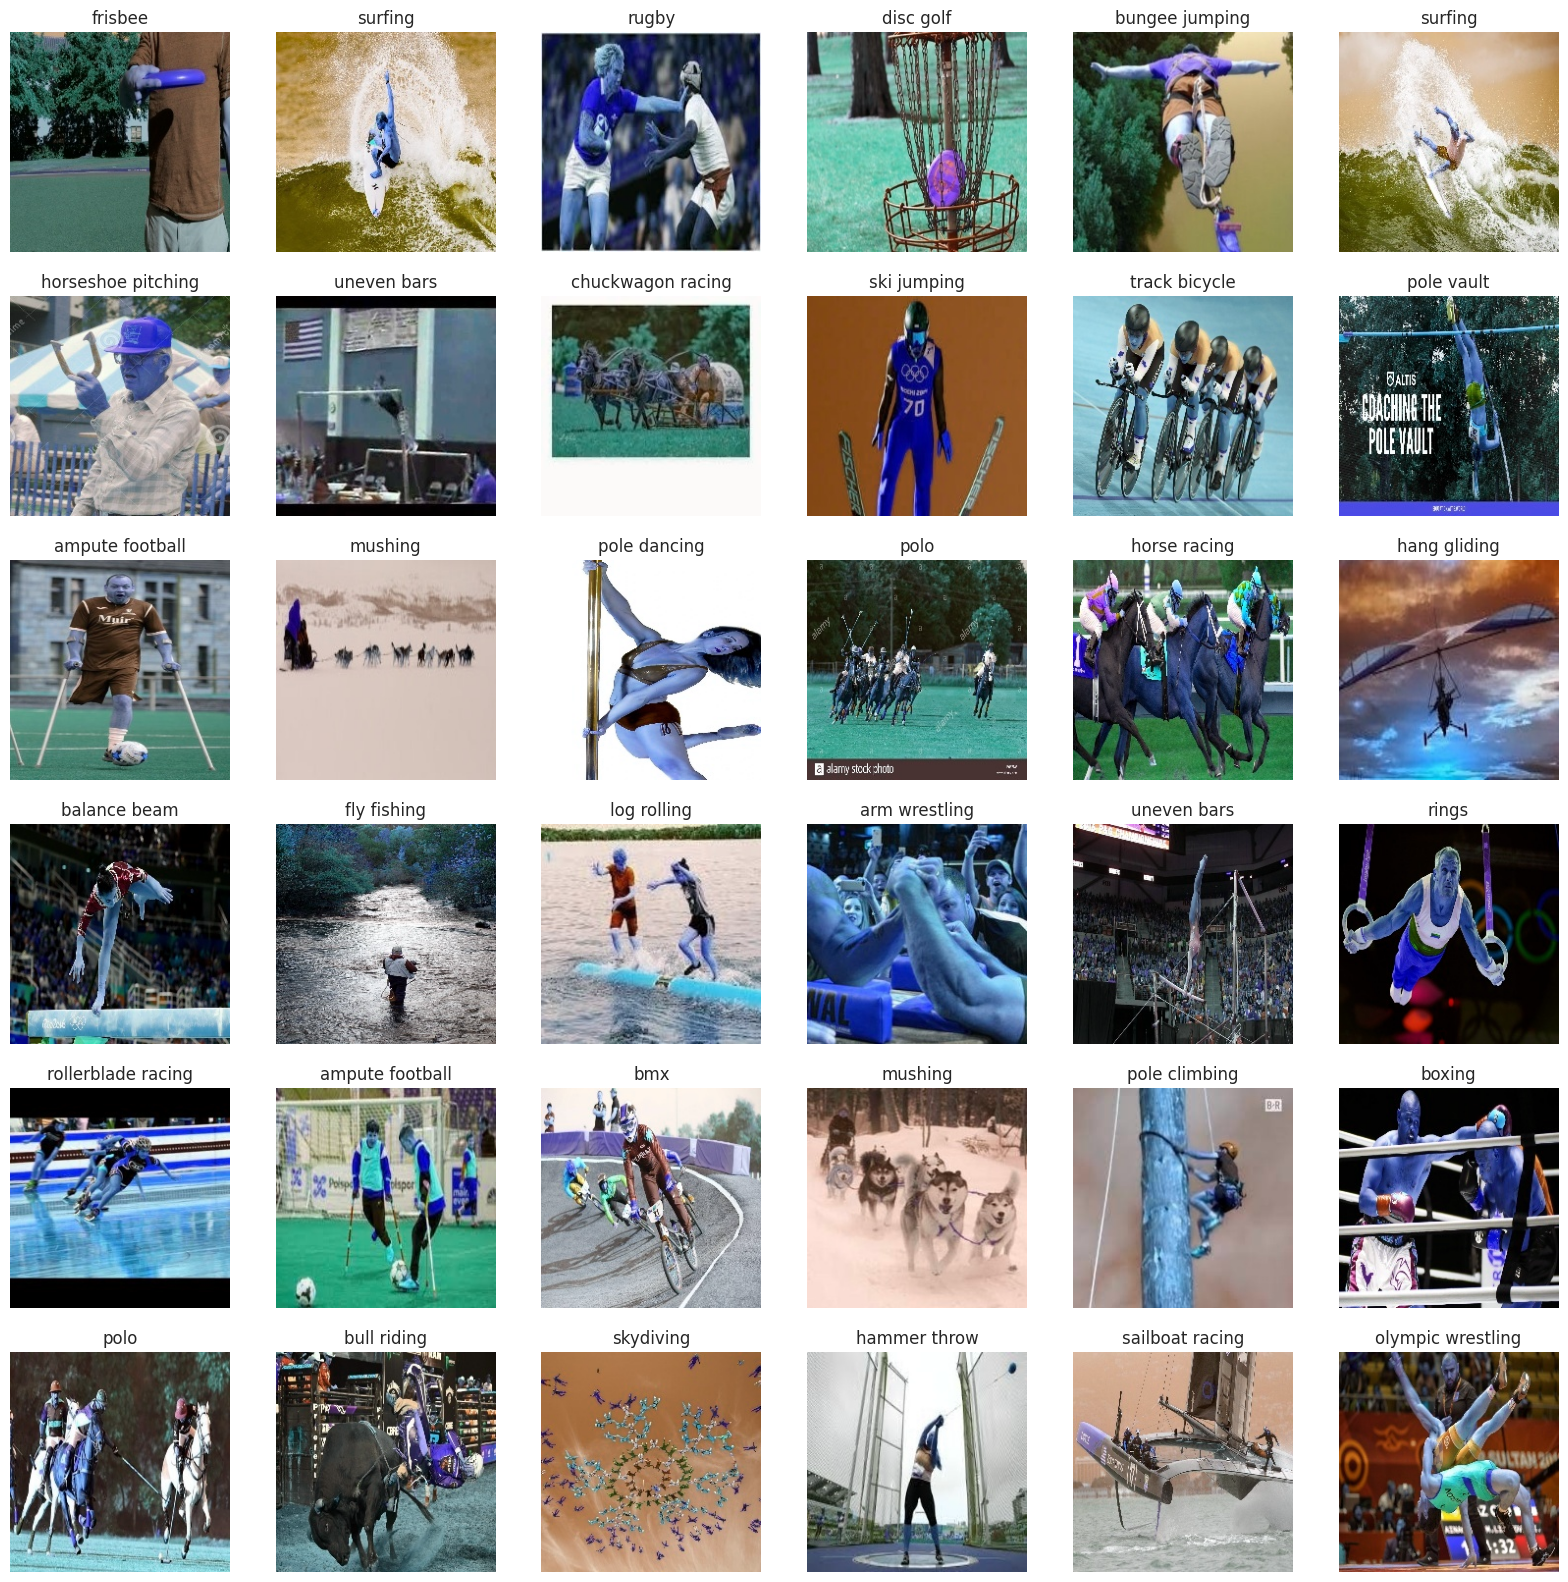

In [ ]:
plt.figure(figsize=(20, 20))
for n, i in enumerate(list(np.random.randint(0, len(X_train), 36))):
    plt.subplot(6, 6, n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(path_test) :
    files = gb.glob(pathname= str(path_test +"/"+ folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
#X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
#print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')


X_train shape  is (13483, 224, 224, 3)
X_test shape  is (499, 224, 224, 3)
y_train shape  is (13483,)
y_test shape  is (499,)


In [ ]:
KerasModel = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(100 ,activation ="softmax")
])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
  6/211 [..............................] - ETA: 1:51:35 - loss: 4.7814 - accuracy: 0.0104

KeyboardInterrupt: ignored

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))


In [ ]:
print('Model Details are : ')
print(KerasModel.summary())
